# Automated Detection and Classification of Multi-cell Phytoliths at Genera and Species Level Using Deep Learning Algorithm

by Iban Berganzo-Besga 1, Hector A. Orengo 1, Felipe Lumbreras 2, Paloma Aliende 1, Monica N. Ramsey 3,4
1. Landscape Archaeology Research Group, Catalan Institute of Classical Archaeology, Pl. Rovellat s/n, 43003, Tarragona, Spain
2. Computer Vision Center, Computer Science Department, Universitat Autònoma de Barcelona, Edifici O, Campus UAB, 08193, Bellaterra, Spain
3. McDonald Institute for Archaeological Research, University of Cambridge, Downing Street, Cambridge, CB2 3ER, UK
4. Department of Anthropology, Health Sciences Complex, University of Toronto Missisauga, Mississauga, ON, L5L 1C6, Canada

---

# 1. Initialization

---

First of all, edit the notebook configuration to **use GPU**


In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print ("GPU Available: ", tf.test.is_gpu_available())
print (tf.__version__)
import keras
print (keras.__version__)
!/usr/local/cuda/bin/nvcc --version

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU Available:  True
2.15.0
2.15.0
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [2]:
!git clone https://github.com/iberganzo/ArchaeolPhytoliths.git

Cloning into 'ArchaeolPhytoliths'...
remote: Enumerating objects: 66, done.
remote: Total 66 (delta 0), reused 0 (delta 0), pack-reused 66
Receiving objects: 100% (66/66), 5.91 MiB | 27.03 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [3]:
!apt-get update
!apt-get install megatools

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [664 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [1,650 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,624 kB]
Get:10 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [50.5 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1

In [4]:
cd ArchaeolPhytoliths

/content/ArchaeolPhytoliths


In [5]:
!megadl 'https://mega.nz/#!ER8GXIgS!--jyrQr_ImHiGhpqIckF2F4q55e1M2dKss4nU2t9JJE'

Downloaded RGB_RJBDA_VGG19_PreTrained_Ref_5C_1.h5


# 2. Processing

---

The phytolith images (50.00 micrometres) to classify must be saved in **DataToClassify**. Delete previous files in that folder. Now proceed with the classification into *Avena* (red), *Hordeum* (green) or *Triticum* (blue) genera using the deep learning algorithm

In [6]:
!python3 DO_Classification.py

2024-01-24 13:01:49.917827: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-24 13:01:49.917882: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-24 13:01:49.919096: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-24 13:01:50.928802: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Tensorflow:  2.15.0


Figure1 Divided
2024-01-24 13:01:52.880357: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config 



Figure1.jpg


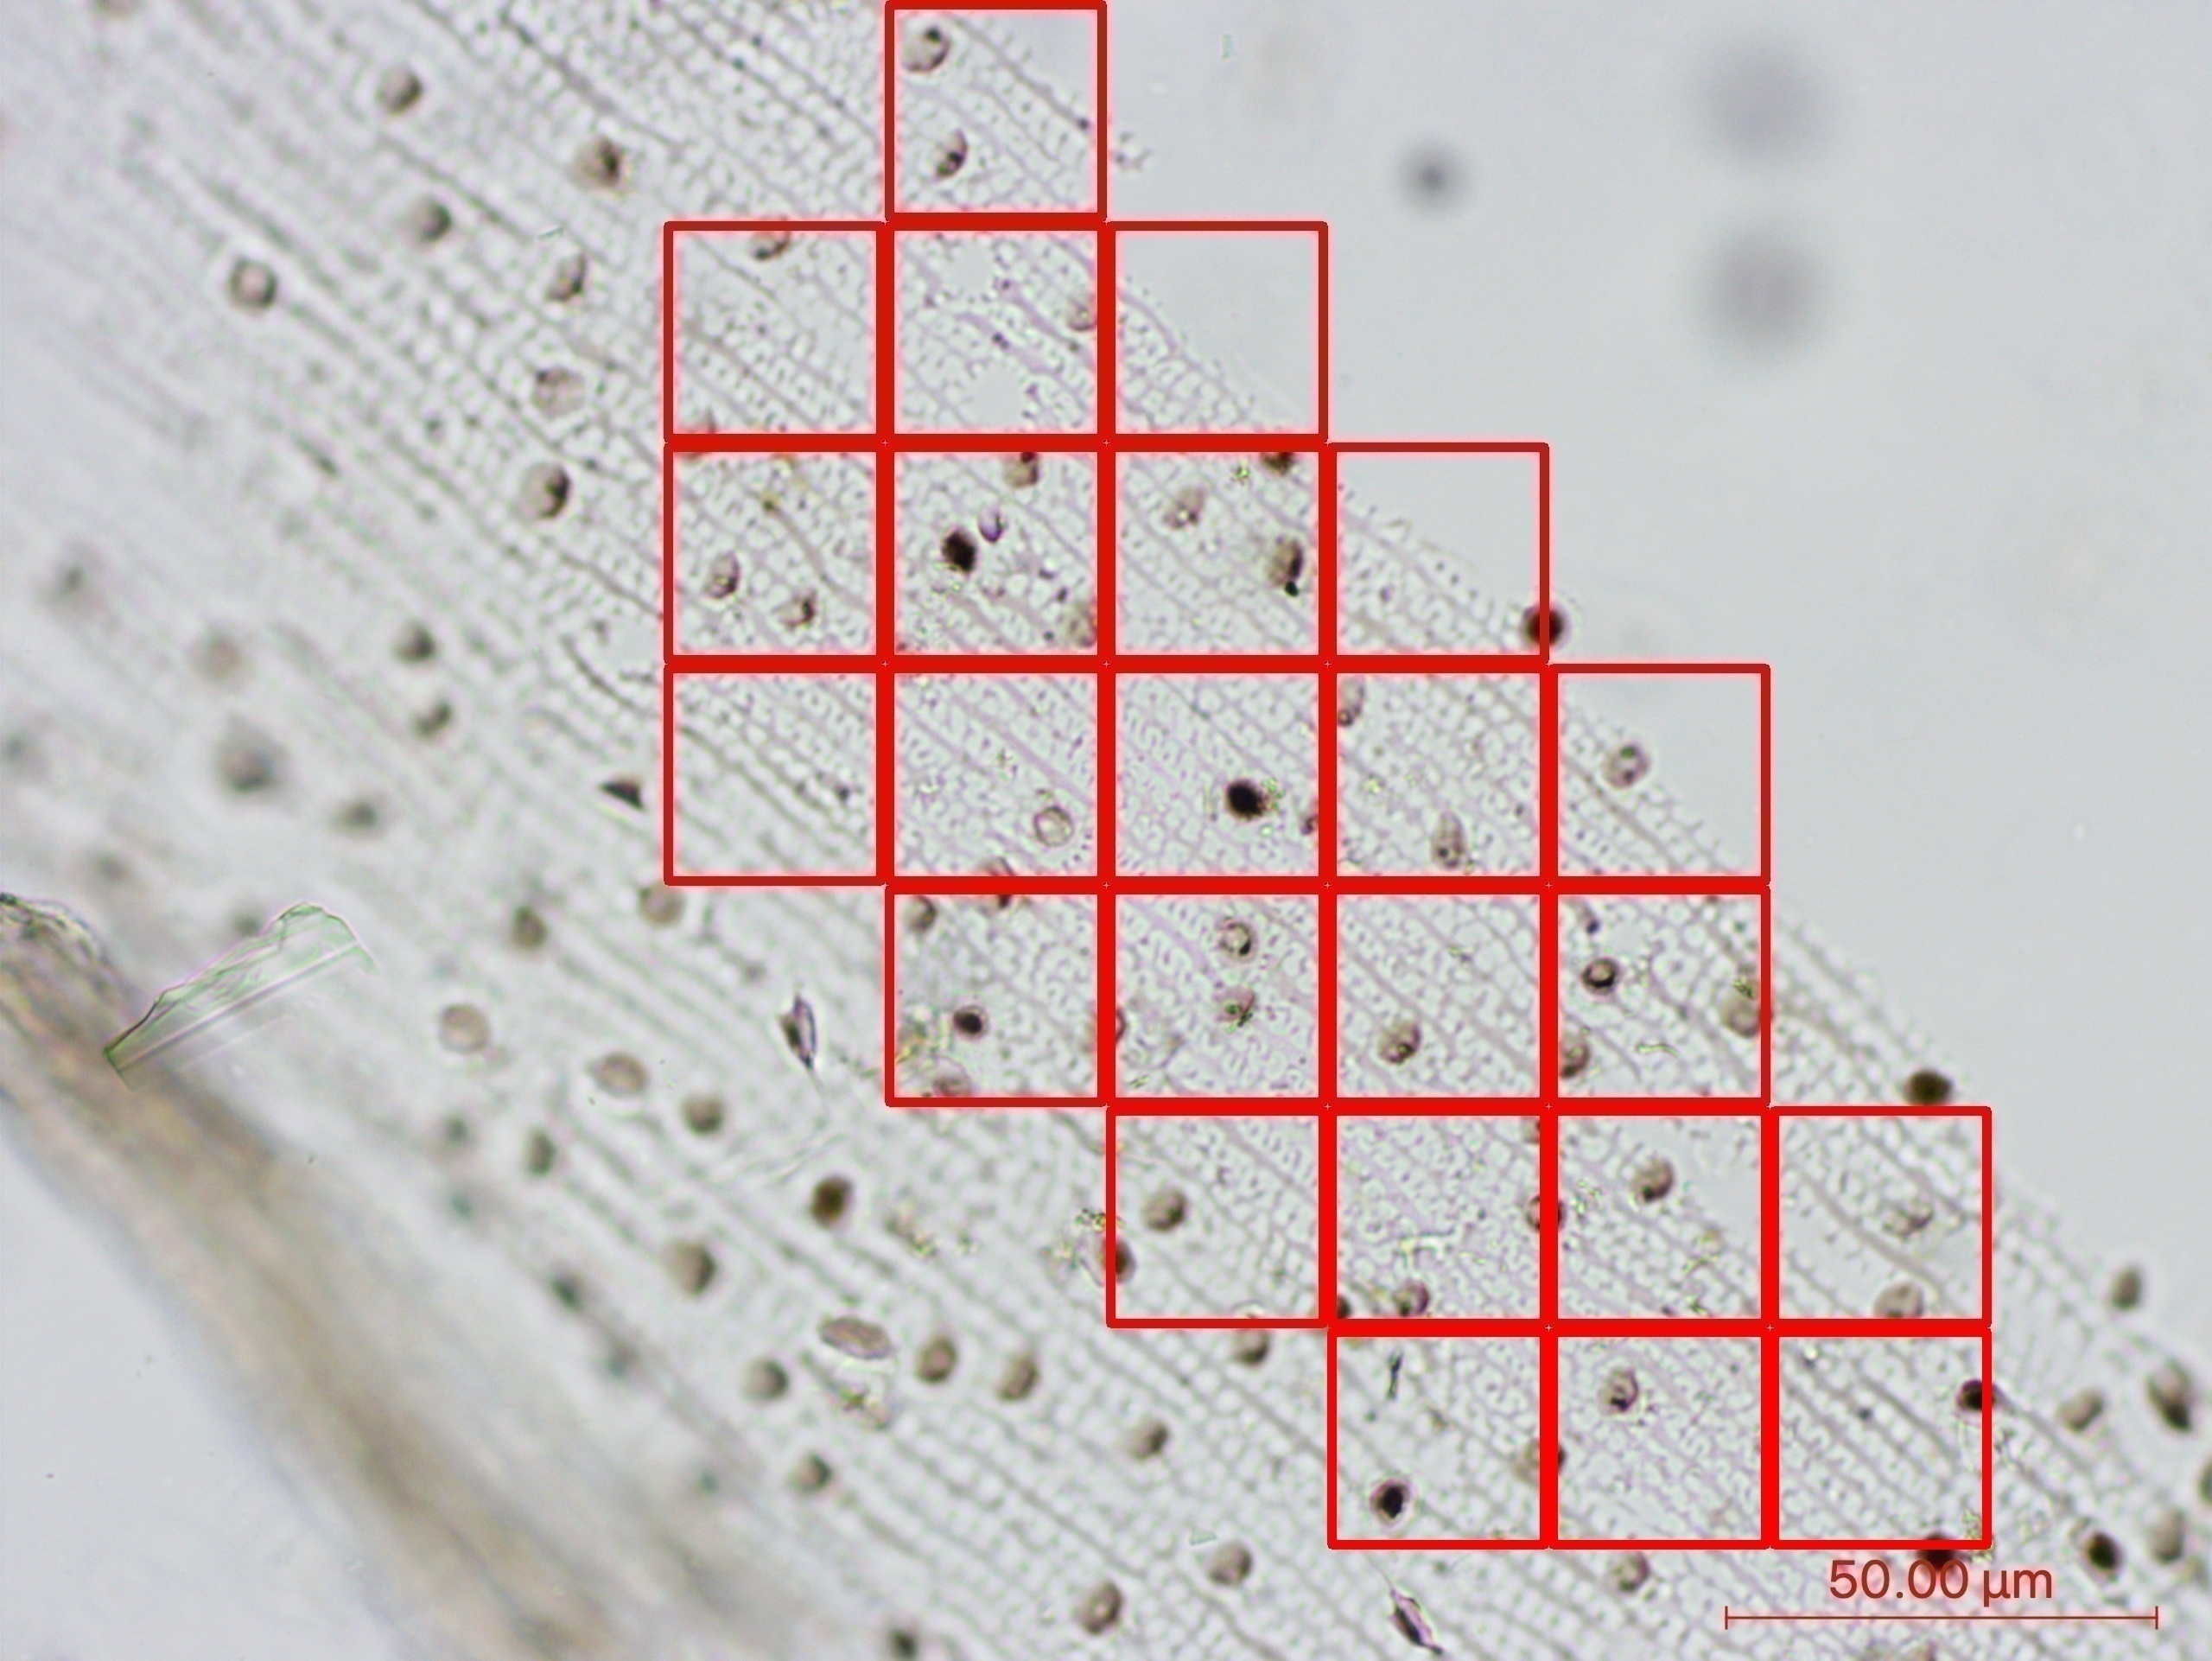

In [7]:
import os
import glob
import cv2
from google.colab.patches import cv2_imshow

path=os.path.abspath(os.getcwd())
pathDataRes=os.path.join(path,'Results')
for filenameR in glob.glob("Results/.*"):
  os.remove(filenameR)
file_list=os.listdir(pathDataRes)
file_list=sorted(file_list)
for i in range (0, len(file_list), 1):
  print('\n')
  print(file_list[i])
  pathDataResImg=os.path.join(pathDataRes,'%s' %file_list[i])
  img = cv2.imread(pathDataResImg)
  cv2_imshow(img)